## Performing sentimental Analysis on amazon and yelp dataset reviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import os
# print(os.listdir("../input"))
plt.style.use('ggplot')

In [ ]:
import csv
df = pd.DataFrame()

In [ ]:
dl_yelp = pd.read_csv('yelp_data.txt', sep='\t', names=['sentence', 'label'], encoding = 'utf-8', header=None)
dl_yelp = pd.DataFrame(dl_yelp)
dl_yelp['source'] = 'yelp'
dl_yelp.values
dl_yelp


#amazon
dm_amazon = pd.read_csv('amazon_data.txt', sep='\t', names=['sentence', 'label'], encoding = 'utf-8')
dm_amazon = pd.DataFrame(dm_amazon)
dm_amazon['source'] = 'amazon'
dm_amazon.values
dm_amazon

#imdb
dv_movie = pd.read_csv('movie_data.csv', quoting=csv.QUOTE_NONE, names=['sentence', 'label'], sep="\t", encoding = "utf-8")
dv_movie = dv_movie.rename(columns={'review':'sentence'})
dv_movie = dv_movie.rename(columns={'sentiment':'label'})
dv_movie['source'] = 'imdb'
dv_movie.values
dv_movie

df = df.append(dm_amazon, ignore_index=True)
df = df.append(dl_yelp, ignore_index=True)
df = df.append(dv_movie, ignore_index=True)
print(df)

                                                sentence label  source
0      So there is no way for me to plug it in here i...     0  amazon
1                            Good case, Excellent value.     1  amazon
2                                 Great for the jawbone.     1  amazon
3      Tied to charger for conversations lasting more...     0  amazon
4                                      The mic is great.     1  amazon
...                                                  ...   ...     ...
51996  "Towards the end of the movie, I felt it was t...   NaN    imdb
51997  "This is the kind of movie that my enemies con...   NaN    imdb
51998  "I saw 'Descent' last night at the Stockholm F...   NaN    imdb
51999  "Some films that you pick up for a pound turn ...   NaN    imdb
52000  "This is one of the dumbest films, I've ever s...   NaN    imdb

[52001 rows x 3 columns]


In [ ]:
filepath_dict = {
                 'yelp':   '/content/amazon_data.txt',
                 'amazon': '/content/amazon_data.txt',
                 'imdb': '/content/movie_data.csv'
}
                                  

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], quoting=csv.QUOTE_NONE, delimiter='\t', encoding = 'utf-8')
    df['source'] = source  # Add another column filled with the source name
    #df['label'] = pd.to_numeric(df['label'], downcast="float")
    df_list.append(df)
    print(df_list)

df = pd.concat(df_list)
#df['label'] = df['label'].replace(np.nan, 0)
print(df.head())
print(df.tail())
#print(df.iloc[0])

[                                              sentence  label source
0    So there is no way for me to plug it in here i...      0   yelp
1                          Good case, Excellent value.      1   yelp
2                               Great for the jawbone.      1   yelp
3    Tied to charger for conversations lasting more...      0   yelp
4                                    The mic is great.      1   yelp
..                                                 ...    ...    ...
995  The screen does get smudged easily because it ...      0   yelp
996  What a piece of junk.. I lose more calls on th...      0   yelp
997                       Item Does Not Match Picture.      0   yelp
998  The only thing that disappoint me is the infra...      0   yelp
999  You can not answer calls with the unit, never ...      0   yelp

[1000 rows x 3 columns]]
[                                              sentence  label source
0    So there is no way for me to plug it in here i...      0   yelp
1     

In [ ]:
# Using both CountVectorizer and TfidfVectorizer separately of the sklearn library
#perform the Logistic regression classification in the IMDb dataset and evaluate the accuracies in the test set.
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']
df_amazon = df[df['source'] == 'amazon']
df_imdb = df[df['source'] == 'imdb']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences1 = df_amazon['sentence'].values
y1 = df_amazon['label'].values

sentences2 = df_imdb['sentence'].values
y2 = df_imdb['label'].values

# YELP
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30, random_state=1000)

# AMAZON
sentences1_train, sentences1_test, y1_train, y1_test = train_test_split(sentences1, y1, 
                                                                        test_size=0.30, random_state=1000)
# IDMB
sentences2_train, sentences2_test, y2_train, y2_test = train_test_split(sentences2, y2, 
                                                                        test_size=0.30, random_state=1000)

In [ ]:
import nltk
import re
import string 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support as score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
stopwords.words('english')
print(stopwords.words('english'))
m_data = pd.read_csv("/content/movie_data.csv")
print(m_data.head())
print(m_data.shape)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'ov

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')

#Removing punctuations from entire dataset
ps = string.punctuation
ps

#Function for removing punctions
def remove_punc(text):
    clean = "".join([x.lower() for x in text if x not in ps])
    return clean

#Applying the 'remove_punc' function to entire dataset
m_data['no_punc'] = m_data['review'].apply(lambda z:remove_punc(z))

#Function for Tokenizing entire data for representing every word as datapoint
def tokenize(text):
    tokens = re.split("\W+",text)
    return tokens

#Applying the 'tokenize' function to entire dataset
m_data['tokenized_Data'] = m_data['no_punc'].apply(lambda z:tokenize(z))

#Importing stopwords from NLTK Library to remove stopwords now that we have tokenized it
stopwords = nltk.corpus.stopwords.words('english')

#Function for removing stopwords from single row
def remove_stopwords(tokenized_words):
    Ligit_text=[word for word in tokenized_words if word not in stopwords]
    return Ligit_text

#Applying the function 'remove_stopwords' from the entire dataset
m_data["no_stop"] = m_data["tokenized_Data"].apply(lambda z:remove_stopwords(z))

#Importing 'WordNetLemmatizer' as lemmatizing function to find lemma's of words
wnl = nltk.wordnet.WordNetLemmatizer()

#Function for lemmatizing the tokenzied text
def lemmatizing(tokenized_text):
    lemma = [wnl.lemmatize(word) for word in tokenized_text]
    return lemma

#Applying the 'lemmatizing' function to entire dataset     
m_data['lemmatized'] = m_data['no_stop'].apply(lambda z:lemmatizing(z))

m_data['lemmatized'] = [" ".join(review) for review in m_data['lemmatized'].values]

m_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,no_punc,tokenized_Data,no_stop,lemmatized
0,I went and saw this movie last night after bei...,1,i went and saw this movie last night after bei...,"[i, went, and, saw, this, movie, last, night, ...","[went, saw, movie, last, night, coaxed, friend...",went saw movie last night coaxed friend mine i...
1,Actor turned director Bill Paxton follows up h...,1,actor turned director bill paxton follows up h...,"[actor, turned, director, bill, paxton, follow...","[actor, turned, director, bill, paxton, follow...",actor turned director bill paxton follows prom...
2,As a recreational golfer with some knowledge o...,1,as a recreational golfer with some knowledge o...,"[as, a, recreational, golfer, with, some, know...","[recreational, golfer, knowledge, sports, hist...",recreational golfer knowledge sport history pl...
3,"I saw this film in a sneak preview, and it is ...",1,i saw this film in a sneak preview and it is d...,"[i, saw, this, film, in, a, sneak, preview, an...","[saw, film, sneak, preview, delightful, cinema...",saw film sneak preview delightful cinematograp...
4,Bill Paxton has taken the true story of the 19...,1,bill paxton has taken the true story of the 19...,"[bill, paxton, has, taken, the, true, story, o...","[bill, paxton, taken, true, story, 1913, us, g...",bill paxton taken true story 1913 u golf open ...


In [ ]:
#Splitting data into smaller dataframes for the purpose of Training and Testing
x1 = m_data.iloc[:25000,5]
x2 = m_data.iloc[25000:50000,5]
y1 = m_data.iloc[:25000,1]
y2 = m_data.iloc[25000:50000,1]
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
count_vect = CountVectorizer()
xv_train = count_vect.fit_transform(x1.values)
xv_test = count_vect.transform(x2.values)
print(xv_train.shape)
print(xv_test.shape)

(25000, 109532)
(25000, 109532)


In [ ]:
#Declaring and applying TFIDF functions to train and test data
tdf_vect = TfidfVectorizer(ngram_range=(1,2))
tdf_train = tdf_vect.fit_transform(x1.values)
tdf_test=tdf_vect.transform(x2.values)
print(tdf_train.shape)
print(tdf_test.shape)

(25000, 1811184)
(25000, 1811184)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tdf_vect = TfidfVectorizer()
x_tdf = tdf_vect.fit_transform(m_data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tdf,m_data["sentiment"],test_size=0.5)

lg = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs', multi_class='auto', max_iter=500)
lg.fit(x_train,y_train)
y_prediction = lg.predict(x_test)
f1 = f1_score(y_prediction,y_test)
print('F1 score',f1*100)
print('Confusion Matrix', confusion_matrix(y_test,y_prediction), "\n")
print('Classification', classification_report(y_test,y_prediction), "\n")
print('Accuracy Score', accuracy_score(y_test, y_prediction)*100)

F1 score 89.14507566753824
Confusion Matrix [[11009  1466]
 [ 1274 11251]] 

Classification               precision    recall  f1-score   support

           0       0.90      0.88      0.89     12475
           1       0.88      0.90      0.89     12525

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000
 

Accuracy Score 89.03999999999999


In [ ]:
#Classifying the Amazon dataset using Logistic Regression and Neural Network
#compare the performances and show the confusion matrices.
dm_amazon = pd.read_csv('/content/amazon_data.txt', sep='\t', names=['sentence', 'label'], encoding = 'unicode_escape')
dm_amazon = pd.DataFrame(dm_amazon)
dm_amazon['source'] = 'amazon'
dm_amazon.values
dm_amazon
ax = dm_amazon['sentence'].values
ay = dm_amazon['label'].values

In [ ]:
dt_train, dt_test, y_train, y_test = train_test_split(ax, ay, test_size=0.30, random_state=1000)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(dt_train)
dt_train_vect=vectorizer.transform(dt_train)
dt_test_vect=vectorizer.transform(dt_test)
print(dt_train_vect)
print(dt_test_vect)

  (0, 140)	1
  (0, 183)	1
  (0, 602)	1
  (0, 656)	1
  (0, 686)	1
  (0, 883)	1
  (0, 941)	1
  (0, 1138)	1
  (0, 1272)	1
  (0, 1285)	1
  (0, 1340)	1
  (0, 1369)	1
  (0, 1474)	1
  (1, 56)	1
  (1, 74)	1
  (1, 100)	1
  (1, 163)	1
  (1, 389)	1
  (1, 524)	1
  (1, 688)	1
  (1, 691)	1
  (1, 717)	1
  (1, 845)	1
  (1, 866)	1
  (1, 1458)	1
  :	:
  (697, 939)	1
  (697, 1023)	1
  (697, 1109)	1
  (697, 1132)	1
  (697, 1272)	1
  (697, 1333)	1
  (697, 1423)	1
  (697, 1428)	1
  (698, 70)	1
  (698, 73)	1
  (698, 463)	1
  (698, 524)	1
  (698, 618)	1
  (698, 686)	1
  (698, 688)	1
  (698, 881)	1
  (698, 985)	1
  (698, 994)	1
  (698, 1054)	1
  (698, 1272)	1
  (698, 1428)	1
  (698, 1468)	1
  (699, 109)	1
  (699, 1218)	1
  (699, 1401)	1
  (0, 129)	1
  (0, 1288)	1
  (1, 140)	1
  (1, 414)	1
  (1, 692)	1
  (1, 1272)	1
  (2, 74)	1
  (2, 509)	1
  (2, 580)	1
  (2, 742)	1
  (2, 1164)	1
  (3, 74)	1
  (3, 508)	1
  (3, 688)	1
  (3, 994)	1
  (3, 1285)	1
  (3, 1403)	1
  (3, 1449)	1
  (4, 26)	1
  (4, 459)	1
  (4, 508)	1
  

In [ ]:
#Using logistic regression
slog_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=slog_reg.fit(dt_train_vect, y_train)
lscore = slog_reg.score(dt_test_vect, y_test)

[LibLinear]

In [ ]:
#Using neural network
print("Accuracy:", lscore)

Accuracy: 0.79


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
input_dim = dt_train_vect.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                14810     
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 14,821
Trainable params: 14,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train it
model.fit(dt_train_vect, y_train, epochs=25, batch_size=10)
# Evaluate it
_, accuracy = model.evaluate(dt_train_vect, y_train)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


70/70 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5886
Epoch 2/25
70/70 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.8471
Epoch 3/25
70/70 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.9086
Epoch 4/25
70/70 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.9400
Epoch 5/25
70/70 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.9600
Epoch 6/25
70/70 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9743
Epoch 7/25
70/70 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9829
Epoch 8/25
70/70 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9929
Epoch 9/25
70/70 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9943
Epoch 10/25
70/70 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9957
Epoch 11/25
70/70 [===========

#### The accuracy for Neural and Logistic regression

Neural Network = 0.9986

Logistric regression = 0.79

In [ ]:
#Generate classification model for the Yelp dataset  with   K-NN algorithms
#test the model for different values for K (from 1 to 5) using a for loop and record and plot the KNN’s testing accuracy in a variable (scores).  
yp_yelp = pd.read_csv('yelp_data.txt', sep='\t', names=['sentence', 'label'], encoding = 'unicode_escape')
yp_yelp = pd.DataFrame(yp_yelp)
yp_yelp['source'] = 'yelp'
yp_yelp.values
yp_yelp
dt = yp_yelp['sentence'].values
y1 = yp_yelp['label'].values

In [ ]:
xdt_train, xdt_test, y_train1, y_test1 = train_test_split(xdata, y1, test_size=0.30, random_state=1000)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(xdata_train)
xdt_train_vect=vectorizer.transform(xdt_train)
xdt_test_vect=vectorizer.transform(xdt_test)
print(xdata_train_vect)
print(xdata_test_vect)

  (0, 60)	1
  (0, 353)	1
  (0, 466)	1
  (0, 617)	1
  (0, 988)	1
  (0, 1337)	1
  (0, 1376)	1
  (0, 1438)	1
  (0, 1450)	1
  (0, 1479)	1
  (0, 1514)	1
  (0, 1537)	1
  (1, 75)	1
  (1, 151)	1
  (1, 442)	1
  (1, 466)	1
  (1, 686)	1
  (1, 764)	1
  (1, 783)	1
  (1, 915)	1
  (1, 988)	1
  (1, 1001)	1
  (1, 1076)	1
  (1, 1086)	1
  (1, 1087)	1
  :	:
  (696, 1587)	1
  (697, 41)	1
  (697, 640)	1
  (697, 1164)	2
  (697, 1205)	1
  (697, 1450)	1
  (697, 1476)	1
  (698, 586)	1
  (698, 640)	1
  (698, 935)	1
  (698, 979)	1
  (698, 1450)	1
  (699, 13)	1
  (699, 14)	1
  (699, 56)	1
  (699, 106)	1
  (699, 340)	1
  (699, 541)	1
  (699, 661)	1
  (699, 742)	1
  (699, 785)	1
  (699, 988)	1
  (699, 1080)	1
  (699, 1449)	1
  (699, 1587)	2
  (0, 112)	1
  (0, 633)	1
  (0, 974)	1
  (0, 1627)	1
  (1, 74)	1
  (1, 432)	1
  (1, 633)	1
  (1, 753)	1
  (1, 1091)	1
  (1, 1456)	1
  (1, 1467)	1
  (1, 1660)	1
  (2, 41)	1
  (2, 56)	2
  (2, 88)	1
  (2, 336)	1
  (2, 553)	1
  (2, 783)	1
  (2, 852)	1
  (2, 963)	1
  (2, 978)	1
  (2, 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xdt_train_vect, y_train1)
    knnscore = knn.score(xdt_test_vect, y_test1)
    print("Accuracy:", knnscore)

Accuracy: 0.6366666666666667
Accuracy: 0.5966666666666667
Accuracy: 0.62
Accuracy: 0.6266666666666667
Accuracy: 0.6533333333333333
Accuracy: 0.6533333333333333
Accuracy: 0.6066666666666667
Accuracy: 0.5966666666666667
Accuracy: 0.6166666666666667
Accuracy: 0.62
Accuracy: 0.64
Accuracy: 0.6166666666666667
Accuracy: 0.6433333333333333
Accuracy: 0.6433333333333333
Accuracy: 0.6633333333333333
Accuracy: 0.65
Accuracy: 0.67
Accuracy: 0.6666666666666666
Accuracy: 0.65


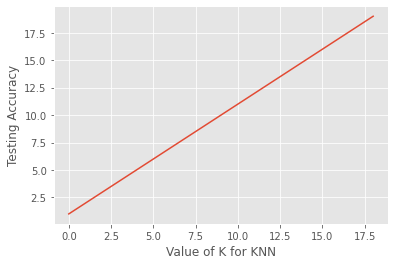

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

#Plot the relationship between k and testing accuracy
plt.plot(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [ ]:
##Generate prediction for the following  reviews  based Logistic regression , classifier  in Amazon dataset:
#Review1 = "SUPERB, I AM IN LOVE IN THIS PHONE"   
#Review 2 = "Do not purchase this product. My cell phone blast when  I switched the charger"   
mz_amazon = pd.read_csv('amazon_data.txt', sep='\t', names=['sentence', 'label'], encoding = 'unicode_escape')
mz_amazon = pd.DataFrame(mz_amazon)
mz_amazon['source'] = 'amazon'
mz_amazon.values
mz_amazon
ax = mz_amazon['sentence'].values
ay = mz_amazon['label'].values
[print(mz_amazon)]

                                              sentence  label  source
0    So there is no way for me to plug it in here i...      0  amazon
1                          Good case, Excellent value.      1  amazon
2                               Great for the jawbone.      1  amazon
3    Tied to charger for conversations lasting more...      0  amazon
4                                    The mic is great.      1  amazon
..                                                 ...    ...     ...
995  The screen does get smudged easily because it ...      0  amazon
996  What a piece of junk.. I lose more calls on th...      0  amazon
997                       Item Does Not Match Picture.      0  amazon
998  The only thing that disappoint me is the infra...      0  amazon
999  You can not answer calls with the unit, never ...      0  amazon

[1000 rows x 3 columns]


[None]

In [ ]:
mX_train = mz_amazon.loc[0:499, 'sentence'].values
mY_train = mz_amazon.loc[0:499, 'label'].values
mX_test = mz_amazon.loc[500:999, 'sentence'].values
mY_test = mz_amazon.loc[500:999, 'label'].values
print(mX_train.shape)
print(mY_train.shape)
print(mX_test.shape)
print(mY_test.shape)

(500,)
(500,)
(500,)
(500,)


In [ ]:
count_vect = CountVectorizer()
mc_train = count_vect.fit_transform(mX_train)
mc_test = count_vect.transform(mX_test)
print(mc_train.shape)
print(mc_test.shape)

(500, 1139)
(500, 1139)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(mX_train)
test_vectors = vectorizer.transform(mX_test)

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
Logis = LogisticRegression()
t0 = time.time()
Logis.fit(train_vectors, mY_train)
t1 = time.time()
prediction_logis = Logis.predict(test_vectors)
t2 = time.time()
time_logis_train = t1-t0
time_logis_predict = t2-t1
print("Training time: %fs; Prediction time: %fs" % (time_logis_train, time_logis_predict))
report = classification_report(tY_test, prediction_logis)

Training time: 0.019202s; Prediction time: 0.000389s


In [ ]:
review = """SUPERB, I AM IN LOVE IN THIS PHONE"""
review_vector = vectorizer.transform([review])
print(Logis.predict(review_vector))

[1]
